<a href="https://colab.research.google.com/github/karman07/all_ml_dl_r/blob/master/hackthon_1_sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install --force-reinstall --no-cache-dir numpy==1.26.4 scipy==1.11.4 pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 154.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 186.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 128.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.2

In [52]:
!pip install pycaret &> /dev/null

In [53]:
import pandas as pd
import numpy as np

df_sample = pd.read_csv('sample_submission.csv')

In [54]:
df_sample

,id,target
0,1,163.18
1,2,159.15
2,3,136.34
3,4,175.25
4,5,128.31
...,...,...
4995,4996,123.78
4996,4997,169.16
4997,4998,160.62
4998,4999,178.06


In [55]:
df_train = pd.read_csv('train.csv')

In [56]:
df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,52.843,66.492,57.300,25.224,39.213,56.593,27.157,67.453,55.690,36.504,...,46.375,78.489,36.789,55.797,43.135,37.513,64.094,43.039,42.852,148.76994
1,50.478,53.147,46.412,38.045,52.160,50.398,60.157,44.022,48.668,45.512,...,61.904,46.994,35.492,55.057,43.859,54.722,51.982,43.310,46.613,152.01250
2,16.432,30.201,43.268,76.786,58.864,24.046,46.519,63.948,50.190,65.539,...,27.011,26.714,66.842,32.628,47.996,75.920,24.627,56.853,65.180,141.96694
3,39.355,33.501,76.737,57.453,58.991,49.938,42.713,71.836,47.394,64.772,...,44.349,45.166,85.341,32.967,26.003,40.192,41.518,74.502,37.807,152.49692
4,30.337,62.905,70.896,35.969,45.878,56.114,45.075,61.684,58.865,41.360,...,45.491,65.265,48.155,49.756,48.782,44.316,43.562,41.068,52.805,149.01620


In [57]:
df_train.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'target'],
      dtype='object')

In [58]:
from pycaret.regression import *

reg_setup = setup(
    data=df_train,
    target='target',
    normalize=True,
    feature_selection=True,
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 20
[LightGBM] [Info] Start training from score 150.797978


,Description,Value
0,Session id,1326
1,Target,target
2,Target type,Regression
3,Original data shape,"(5000, 21)"
4,Transformed data shape,"(5000, 5)"
5,Transformed train set shape,"(3500, 5)"
6,Transformed test set shape,"(1500, 5)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [59]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.8850,38.4695,6.1929,0.1317,0.0409,0.0325,0.6910
lr,Linear Regression,5.0184,40.2206,6.3344,0.0914,0.0419,0.0334,0.5370
ridge,Ridge Regression,5.0185,40.2207,6.3344,0.0914,0.0419,0.0334,0.4360
lar,Least Angle Regression,5.0184,40.2206,6.3344,0.0914,0.0419,0.0334,0.3330
br,Bayesian Ridge,5.0191,40.2218,6.3345,0.0914,0.0419,0.0334,0.2370
huber,Huber Regressor,5.0173,40.2297,6.3351,0.0912,0.0419,0.0334,0.2520
lightgbm,Light Gradient Boosting Machine,5.0118,40.6106,6.3634,0.0831,0.0420,0.0333,1.4790
rf,Random Forest Regressor,5.0270,40.7450,6.3768,0.0791,0.0421,0.0334,2.0670
ada,AdaBoost Regressor,5.0844,41.1395,6.4086,0.0700,0.0423,0.0338,0.3730
et,Extra Trees Regressor,5.1281,42.0104,6.4759,0.0496,0.0427,0.0341,0.8900


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

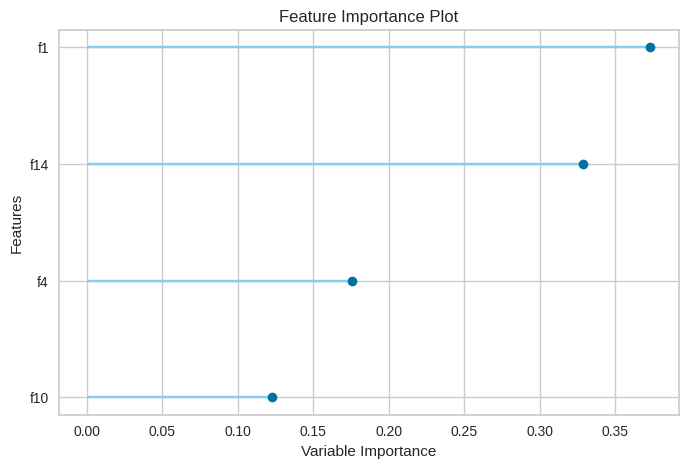

In [60]:
plot_model(best_model, plot='feature')

In [61]:
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8670,38.4112,6.1977,0.1422,0.0411,0.0326
1,4.6021,32.8998,5.7358,0.1847,0.0379,0.0307
2,4.7976,37.6978,6.1399,0.1768,0.0405,0.0319
3,5.3740,48.4458,6.9603,0.0360,0.0462,0.0359
4,5.1702,42.8596,6.5467,0.0580,0.0434,0.0345
5,5.0331,39.0263,6.2471,0.1184,0.0411,0.0334
6,4.6590,35.2971,5.9411,0.1655,0.0392,0.0310
7,5.0212,40.1976,6.3402,0.1046,0.0417,0.0334
8,4.6854,35.3543,5.9459,0.1515,0.0392,0.0311


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
df_test = pd.read_csv('test.csv')

In [63]:
predictions = predict_model(best_model, data=df_test)

In [64]:
predictions

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,prediction_label
0,1,26.688999,61.356998,46.887001,36.752998,51.493999,61.479000,11.820000,50.127998,86.031998,...,39.908001,54.993999,49.342999,29.538000,62.811001,55.388000,36.925999,23.473000,44.472000,148.333237
1,2,66.827003,35.763000,38.362999,50.380001,52.988998,59.043999,51.004002,58.261002,59.046001,...,55.092999,56.467999,48.328999,63.950001,52.875000,58.553001,54.588001,40.390999,37.318001,153.181830
2,3,34.955002,41.924999,47.473000,36.832001,60.471001,54.553001,45.473999,63.261002,62.109001,...,36.801998,46.429001,47.465000,36.661999,45.981998,58.738998,60.819000,47.068001,47.820999,150.621752
3,4,34.605999,54.863998,62.852001,56.325001,38.707001,53.245998,38.273998,38.188000,43.423000,...,47.242001,31.386000,42.307999,55.796001,28.337000,68.357002,56.446999,51.268002,40.328999,149.512074
4,5,56.421001,56.540001,66.611000,42.938999,26.056999,22.215000,33.410000,48.078999,21.261000,...,58.265999,39.553001,63.247002,44.497002,36.852001,34.198002,38.258999,80.932999,35.745998,153.097082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,62.393002,48.445999,53.993000,32.466000,42.119999,60.508999,55.998001,47.811001,57.272999,...,58.025002,43.750000,31.332001,67.935997,51.243999,36.250999,56.430000,50.431999,46.297001,151.279959
4996,4997,35.944000,50.535000,49.925999,45.783001,66.316002,51.464001,42.111000,69.752998,50.081001,...,47.790001,58.219002,60.467999,41.264999,43.930000,49.560001,44.404999,49.511002,33.422001,150.233369
4997,4998,22.038000,44.233002,46.233002,72.665001,49.640999,17.406000,34.959000,57.956001,46.712002,...,24.466999,35.264999,67.226997,31.549000,50.964001,68.181000,30.169001,56.620998,53.094002,147.242671
4998,4999,44.714001,50.341000,50.034000,44.070000,53.820000,70.582001,47.541000,45.571999,68.468002,...,39.335999,41.446999,46.992001,54.245998,62.986000,53.340000,57.285000,44.136002,63.502998,151.252388


In [65]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'target': predictions['prediction_label']
})

submission.to_csv('submission.csv', index=False)
